# Connect to your drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


/!\ Change the **path** in the following cd command

In [ ]:
%cd /content/gdrive/My "Drive/MASTER ATIAM"/info/ML_project_electronic_modelling/mnist_dcgan
!ls

/content/gdrive/My Drive/MASTER ATIAM/info/ML_project_electronic_modelling/mnist_dcgan
electro-modelling  mnist_train.ipynb


Clone the git repository 
Ok if it says "fatal: [...] already exist"

In [ ]:
!git clone https://github.com/nabsara/electro-modelling.git

fatal: destination path 'electro-modelling' already exists and is not an empty directory.


Go to git project directory

In [ ]:
%cd electro-modelling/

/content/gdrive/My Drive/MASTER ATIAM/info/ML_project_electronic_modelling/mnist_dcgan/electro-modelling


In [ ]:
!git config --global user.email "sarah.m.nabi@gmail.com" 
!git config --global user.name "nabsara"

Go to dcgan branch

In [ ]:
!git checkout dcgan

M	src/electro_modelling/models/dcgan.py
Already on 'dcgan'
Your branch is up to date with 'origin/dcgan'.


In [ ]:
# command to put aside some changes in local without doing add/commit
# !git stash

In [ ]:
!git pull

Updating ef5499c..d19d452
Fast-forward
 src/electro_modelling/cli.py                       |  21 ++--
 .../helpers/helpers_visualization.py               |  10 ++
 src/electro_modelling/models/dcgan.py              | 135 ++++++++++-----------
 src/electro_modelling/models/hinge_gan.py          |  23 ++++
 src/electro_modelling/models/least_square_gan.py   |  23 ++++
 src/electro_modelling/models/models.py             |  12 ++
 src/electro_modelling/models/simple_dcgan.py       |  32 +++++
 src/electro_modelling/models/wgan_gp.py            | 109 +++++++++++++++++
 src/electro_modelling/pipelines/mnist_pipeline.py  |  32 ++---
 9 files changed, 299 insertions(+), 98 deletions(-)
 create mode 100644 src/electro_modelling/models/hinge_gan.py
 create mode 100644 src/electro_modelling/models/least_square_gan.py
 create mode 100644 src/electro_modelling/models/models.py
 create mode 100644 src/electro_modelling/models/simple_dcgan.py
 create mode 100644 src/electro_modelling/models/wgan_gp.p

In [ ]:
!git branch

* dcgan
  master


Install python dependencies 

NB: can't use `pip install -r requirements.txt` as there is no python 3.8 available on colab ...

In [ ]:
!pip install click librosa matplotlib numpy pandas Pillow pydantic python-dotenv scikit-learn scipy six torch torchvision tqdm

     |████████████████████████████████| 10.1 MB 5.4 MB/s 


# Test the training pipeline

In [ ]:
import sys
sys.path.append('./src/')

  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: [0/1] 	Step: [0/469]	Time: 0.10030865669250488 (s)	G_loss: 0.7501912713050842	D_loss: 0.6872996091842651


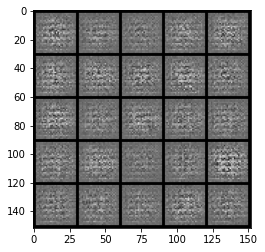

 33%|███▎      | 155/469 [00:16<00:33,  9.48it/s]


KeyboardInterrupt: ignored

In [17]:
from electro_modelling.pipelines.mnist_pipeline import MNISTPipeline


data_dir = "./data"
models_dir = "./models" 
batch_size = 128 
z_dims = 10 
model = "dcgan"
n_epochs = 1 
learning_rate = 0.0002 
k_disc_steps = 1
display_step = 500
show = True

pipeline = MNISTPipeline(model, data_dir, models_dir, batch_size, z_dims)
pipeline.train(
    learning_rate=learning_rate,
    k_disc_steps=k_disc_steps,
    n_epochs=n_epochs,
    display_step=display_step,
    show_fig=show
)

# Example to push some changes to git

NB : do not forget to save files !

In [ ]:
!git status

On branch dcgan
Your branch is up to date with 'origin/dcgan'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   src/electro_modelling/models/dcgan.py
	modified:   src/electro_modelling/pipelines/mnist_pipeline.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add src/electro_modelling/*

The following paths are ignored by one of your .gitignore files:
src/electro_modelling/__pycache__
Use -f if you really want to add them.


In [ ]:
!git status

On branch dcgan
Your branch is up to date with 'origin/dcgan'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   src/electro_modelling/models/dcgan.py
	modified:   src/electro_modelling/pipelines/mnist_pipeline.py



In [ ]:
!git commit -m "fix: saving models checkpoints config"

[dcgan 42dccf5] fix: saving models checkpoints config
 2 files changed, 6 insertions(+), 6 deletions(-)


In [ ]:
!git pull origin dcgan

From https://github.com/nabsara/electro-modelling
 * branch            dcgan      -> FETCH_HEAD
Already up to date.


In [ ]:
!git push https://<REPLACE-WITH-YOUR-GIT-TOKEN>@github.com/nabsara/electro-modelling.git

Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (8/8), 737 bytes | 122.00 KiB/s, done.
Total 8 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/nabsara/electro-modelling.git
   e0b131a..42dccf5  dcgan -> dcgan
